## Image Processing using SimpleITK

### Clear scene and load sample data set using SimpleITK

In [1]:
import JupyterNotebooksLib as slicernb

import SimpleITK as sitk
import sitkUtils as su

# Clear scene
slicer.mrmlScene.Clear(False)

# Load 3D image using SimpleITK
reader = sitk.ImageFileReader()
reader.SetFileName("data/MRBrainTumor1.nrrd")
image = reader.Execute()

### Display SimpleITK image

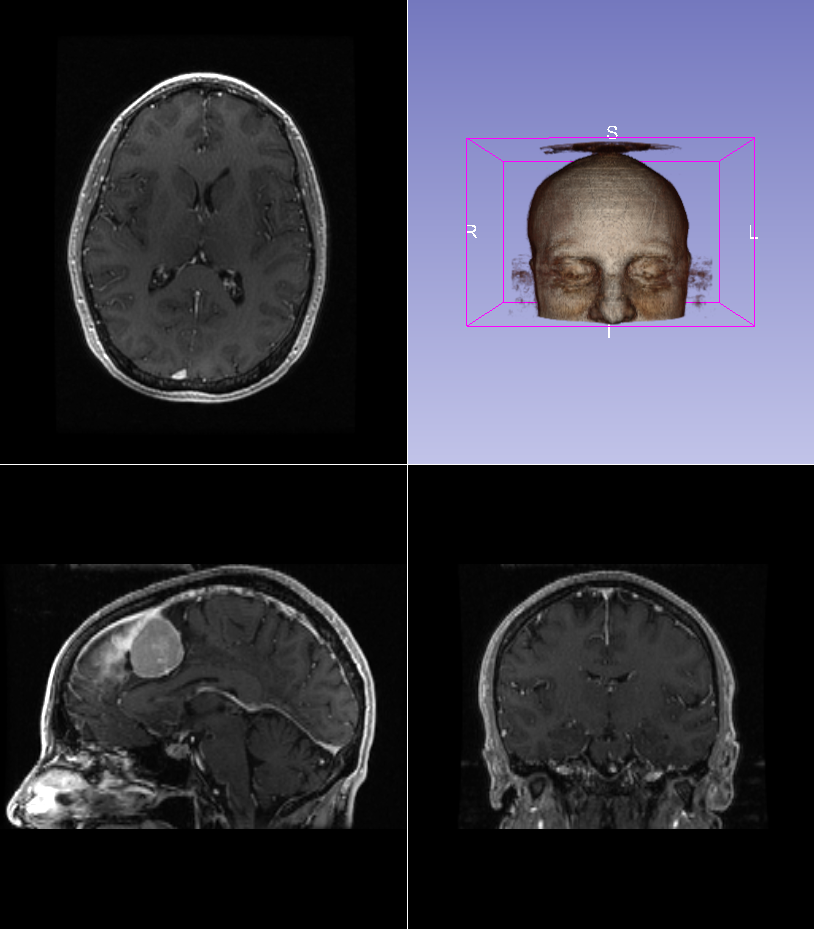

In [2]:
volumeNode = su.PushVolumeToSlicer(image)

# Prevent automatic brightness/contrast update to make the processed images easier to compare
volumeNode.GetDisplayNode().SetAutoWindowLevel(False)

# Set up view layout
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutFourUpView)
# Set up slice views
slicer.util.setSliceViewerLayers(background=volumeNode, fit=True)
# Set up volume rendering
displayNode = slicer.modules.volumerendering.logic().CreateDefaultVolumeRenderingNodes(volumeNode)
displayNode.GetVolumePropertyNode().Copy(slicer.modules.volumerendering.logic().GetPresetByName('MR-Default'))
slicer.util.resetThreeDViews()

# Display views
slicernb.ViewDisplay()

### Process image and show results

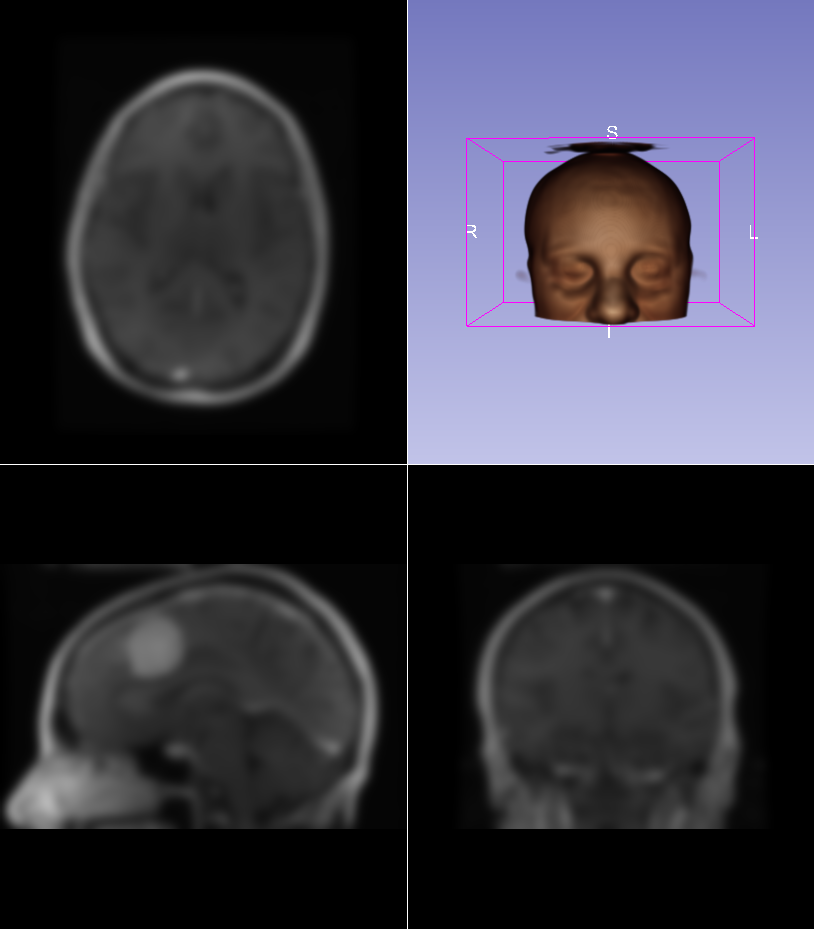

In [3]:
blurFilter = sitk.SmoothingRecursiveGaussianImageFilter()
blurFilter.SetSigma(3.0)
blurredImage = blurFilter.Execute(image)

su.PushVolumeToSlicer(blurredImage, targetNode=volumeNode)
slicernb.ViewDisplay()

### Process the image using another filter and show results

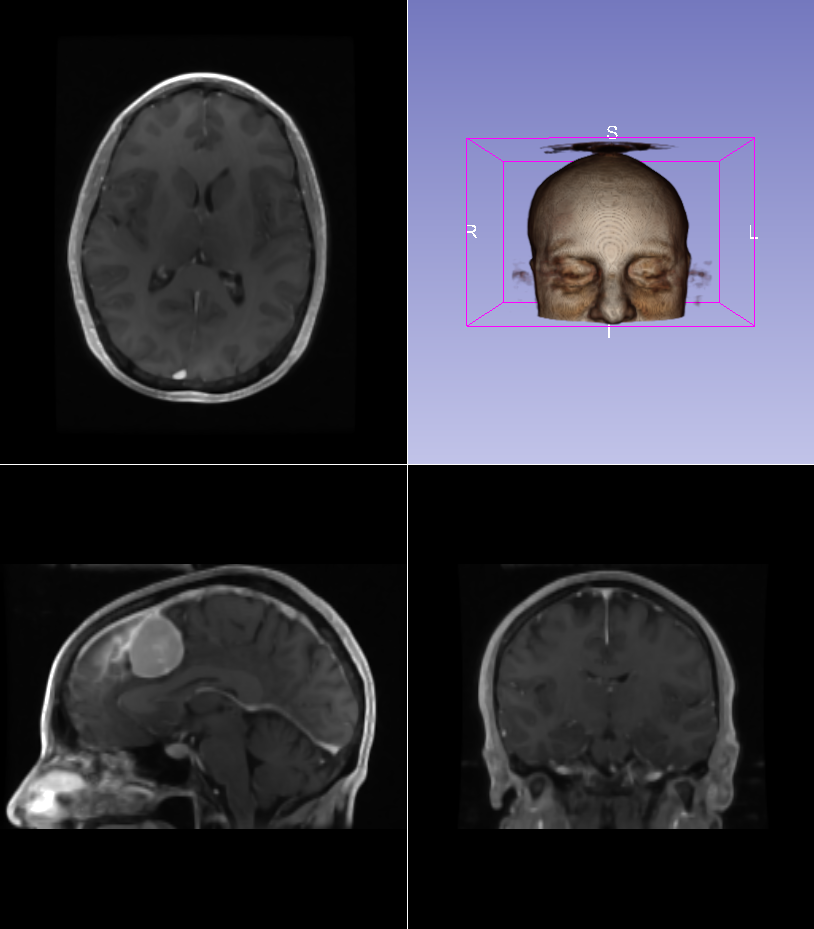

In [4]:
blurFilter2 = sitk.CurvatureFlowImageFilter()
blurFilter2.SetNumberOfIterations(5)
blurFilter2.SetTimeStep(0.15)
blurredImage2 = blurFilter2.Execute(image)

su.PushVolumeToSlicer(blurredImage2, targetNode=volumeNode)
slicernb.ViewDisplay()

#### Run this example in your browser using Binder: [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Slicer/SlicerNotebooks/master?filepath=03_Image_Processing_using_SimpleITK.ipynb)